# Naive Bayes  on CIFAR-10

## Imports

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
from time import time as runtime
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import pickle
from time import time as runtime
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

import random
%matplotlib inline

In [28]:
import pandas as pd
from sklearn import preprocessing,cross_validation,neighbors
df = pd.read_csv('adult.csv')

In [29]:
#create matrix X and target vector y
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
y = df['income']
X = df[columns]

## Data exploration
First data visualisation without any pre-processing on it.
Printing 10 first images from the training set. 

In [30]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Data traitement

In [31]:
labels, uniques=pd.factorize(y)
y=np.array(labels)
print(y)

[0 0 1 ... 0 0 1]


In [32]:
#create matrix X and target vector y
columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
temp1=df['workclass']
labels, uniques=pd.factorize(temp1)
X0=np.array(labels) #workclass

temp1=df['educational-num']
labels, uniques=pd.factorize(temp1)
X1=np.array(labels) #educational-num

temp1=df['marital-status']
labels, uniques=pd.factorize(temp1)
X2=np.array(labels) #marital-status

temp1=df['occupation']
labels, uniques=pd.factorize(temp1)
X3=np.array(labels) #occupation

temp1=df['relationship']
labels, uniques=pd.factorize(temp1)
X4=np.array(labels) #relationship

temp1=df['race']
labels, uniques=pd.factorize(temp1)
X5=np.array(labels) #race

temp1=df['gender']
labels, uniques=pd.factorize(temp1)
X6=np.array(labels) #gender

temp1=df['native-country']
labels, uniques=pd.factorize(temp1)
X7=np.array(labels) #native-country

y = df['income']
X = df[columns]
n,m = X.shape 
print(X.shape)
X0=X0.reshape(n,1)
X1=X1.reshape(n,1)
X2=X2.reshape(n,1)
X3=X3.reshape(n,1)
X4=X4.reshape(n,1)
X5=X5.reshape(n,1)
X6=X6.reshape(n,1)
X7=X7.reshape(n,1)

X=np.hstack((X,X0))
X=np.hstack((X,X1))
X=np.hstack((X,X2))
X=np.hstack((X,X3))
X=np.hstack((X,X4))
X=np.hstack((X,X5))
X=np.hstack((X,X6))
X=np.hstack((X,X7))
print(X.shape)

(48842, 6)
(48842, 14)


## Loading Data & printing shapes

In [33]:
from sklearn import preprocessing,cross_validation,neighbors
import pandas as pd
#split into train and test
split = 0.2
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=split,random_state=21)

In [34]:
# load the pre-shuffled train and test data
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("trainig data shape  : ",x_train.shape)
print("trainig labels shape: ",y_train.shape)

print("testing data shape  : ",x_test.shape)
print("testing labels shape: ",y_test.shape)


trainig data shape  :  (39073, 14)
trainig labels shape:  (39073,)
testing data shape  :  (9769, 14)
testing labels shape:  (9769,)


# Gaussian Naive Bayes

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

fitting the model took: 0.1s
             precision    recall  f1-score   support

      <=50K       0.81      0.95      0.87      7421
       >50K       0.65      0.32      0.42      2348

avg / total       0.77      0.79      0.77      9769



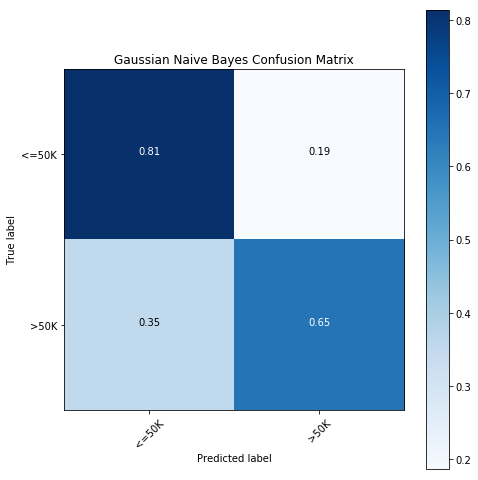

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from time import time as runtime
import itertools
t= runtime()
gnb = GaussianNB()
y_pred1 = gnb.fit(x_train, y_train).predict(x_test)
print("fitting the model took: %.1fs" % (runtime()-t))

from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred1))
conf_matrix = confusion_matrix(y_pred1, y_test)
np.set_printoptions(precision=2)

plt.figure(figsize=(7,7))
plot_confusion_matrix(conf_matrix, classes=['<=50K','>50K'], normalize=True, 
                      title='Gaussian Naive Bayes Confusion Matrix')


# Multinomial Naive bayes 

             precision    recall  f1-score   support

      <=50K       0.80      0.96      0.87      7421
       >50K       0.63      0.23      0.33      2348

avg / total       0.76      0.78      0.74      9769



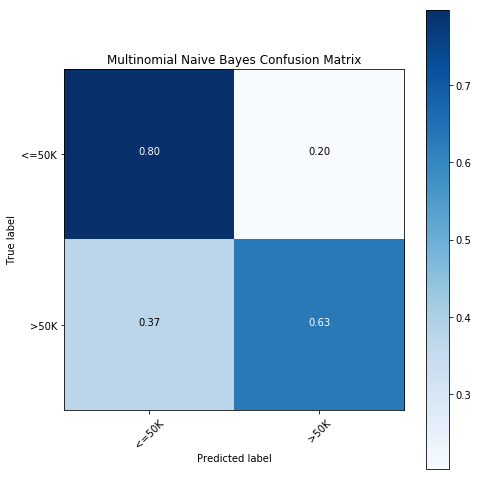

In [37]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB()
y_pred1=mnb.fit(abs(x_train), y_train).predict(abs(x_test))
print(classification_report(y_test, y_pred1))

conf_matrix = confusion_matrix(y_pred1, y_test)
np.set_printoptions(precision=2)

plt.figure(figsize=(7,7))
plot_confusion_matrix(conf_matrix, classes=['<=50K','>50K'], normalize=True, 
                      title='Multinomial Naive Bayes Confusion Matrix')

# Bernoulli Naive Bayes

Accuracy 0.7439
             precision    recall  f1-score   support

      <=50K       0.83      0.87      0.85      7421
       >50K       0.50      0.43      0.46      2348

avg / total       0.75      0.76      0.75      9769



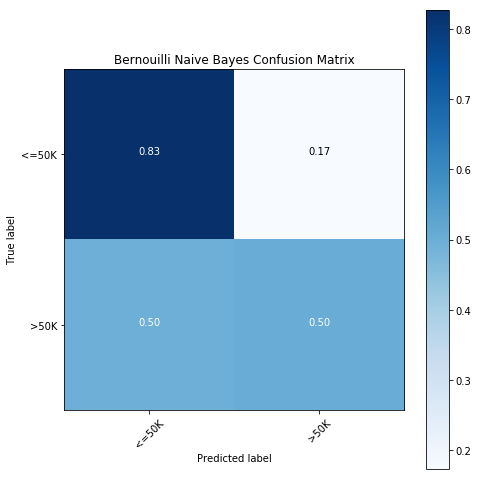

In [38]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()
y_pred1=bnb.fit(x_train, y_train).predict(x_test)
print("Accuracy",sum(y_test == y_pred1)/10000)
print(classification_report(y_test, y_pred1))
conf_matrix = confusion_matrix(y_pred1, y_test)
np.set_printoptions(precision=2)

plt.figure(figsize=(7,7))
plot_confusion_matrix(conf_matrix, classes=['<=50K','>50K'], normalize=True, 
                      title='Bernouilli Naive Bayes Confusion Matrix')